<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB
None
   Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  1500.0          2-Ca

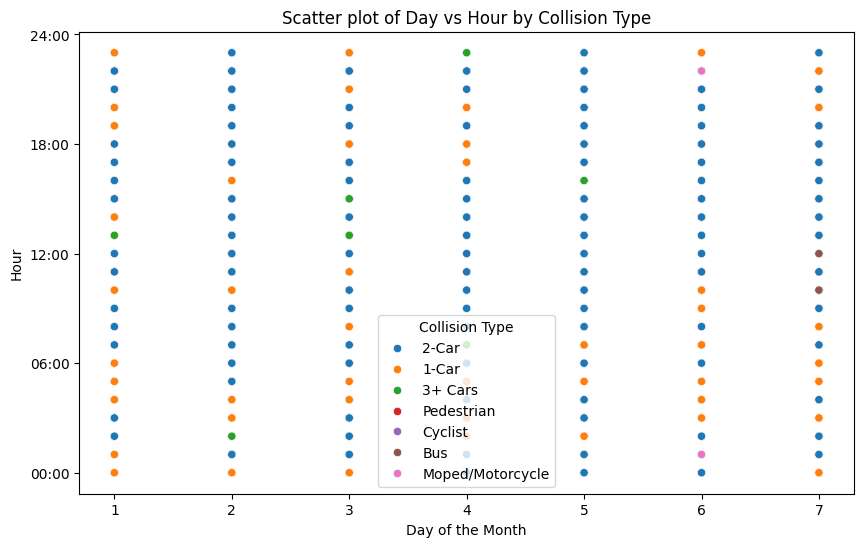

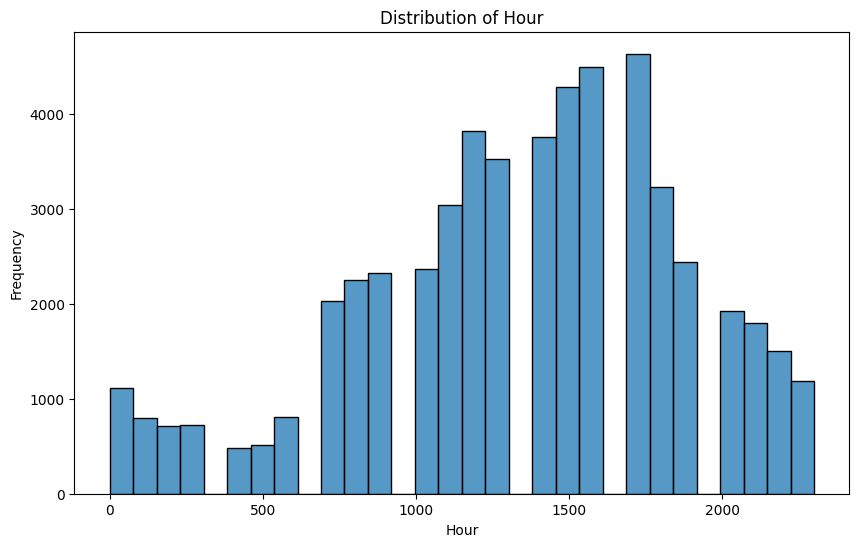

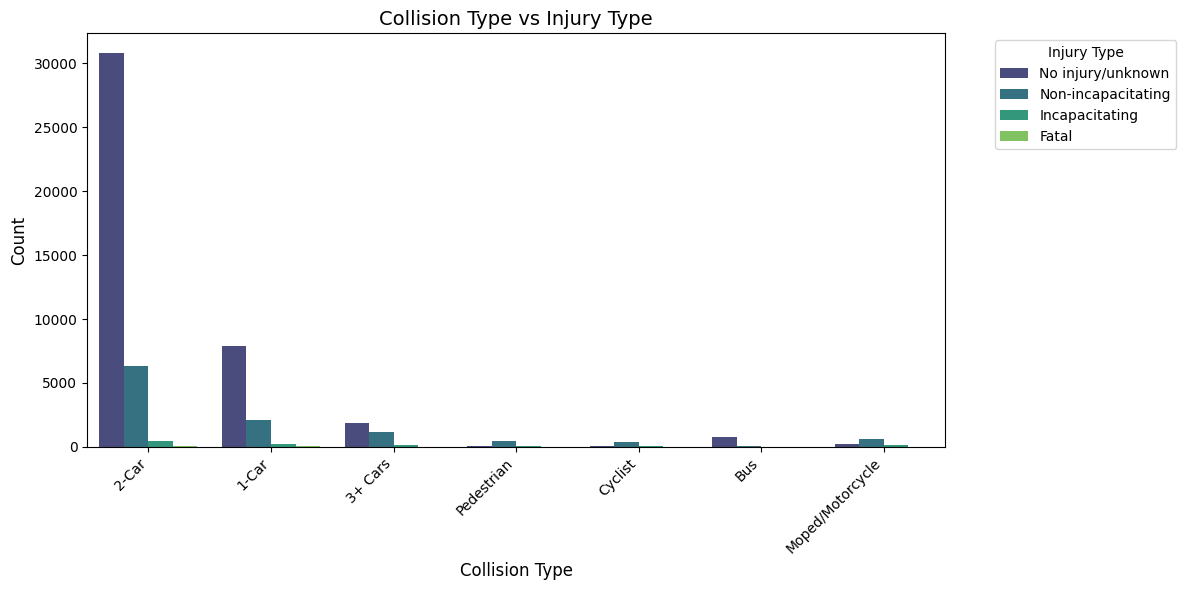

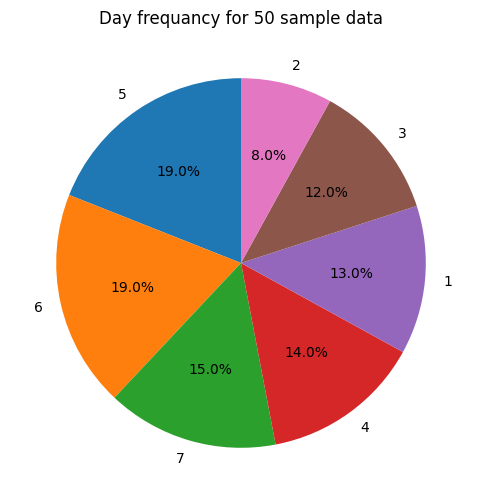

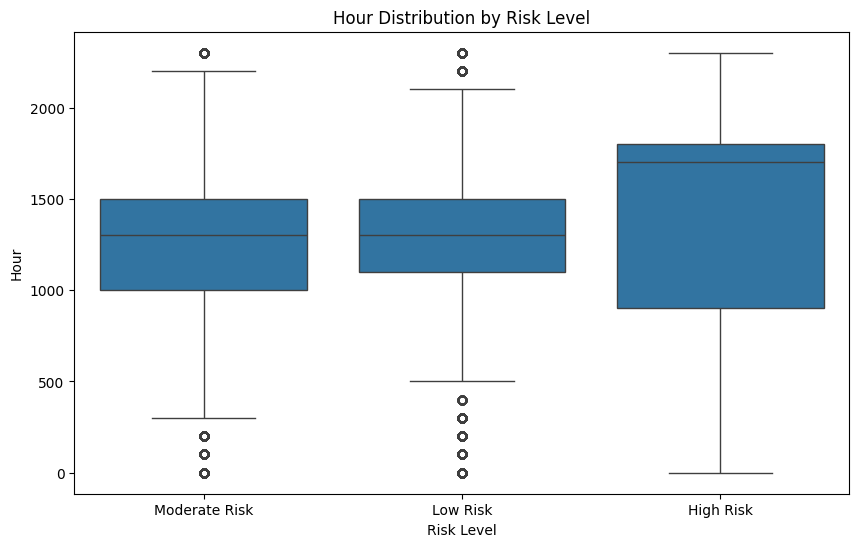


Missing values in each column:
 Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
Risk Level              0
dtype: int64

Total number of missing values:
 1515

Missing values after imputation:
 Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location    0
Latitude             0
Longitude            0
Risk Level           0
Date                 0
dtype: int64

Mean:
 Hour         1347.265349
Latitude       35.582109
Longitude     -78.619224
dtype: float64

Median:
 Hour         1400.000000
Latitude       39.164430
Longitude     -86.530992
dtype: float64

Variance:
 Hour         281477.017532
Latitude        127.390581
Longitude       622.534718
dtype: float64

stander deviation:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load dataset
data1 = pd.read_csv("/workspaces/IT326/Dataset/monroe county car crach 2003-2015.csv", encoding="windows-1252")  
df = pd.DataFrame(data1) 

# Display basic information about the dataset
print(df.info()) 
print(df.head()) # Samples of raw dataset
print(df.describe())

# Class label to classify collision risk
def classify_collision(row):
    if (row['Hour'] >= 1600 and  row['Hour'] <= 2000 ) or (row['Hour'] >= 700 and  row['Hour'] <= 900 ) or row['Weekend?'] == 'Weekend' and row['Injury Type'] == 'Incapacitating':
        return 'High Risk'
    elif row['Injury Type'] == 'No injury/unknown':
        return 'Moderate Risk'
    else:
        return 'Low Risk'

data1['Risk Level'] = data1.apply(classify_collision, axis=1)


# Visualizations // graphs and tables show variables distribution

    # Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Day', y='Hour', data=data1, hue='Collision Type')
plt.title('Scatter plot of Day vs Hour by Collision Type')
plt.xlabel('Day of the Month')
plt.ylabel('Hour')
plt.yticks([0, 600, 1200, 1800, 2400], ['00:00', '06:00', '12:00', '18:00', '24:00']) #newly added
plt.show()

    # Histogram 
plt.figure(figsize=(10, 6))
sns.histplot(data1['Hour'], bins=30)
plt.title('Distribution of Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show() 

# Bar plot showing the frequency of each Collision Type and Injury Type
plt.figure(figsize=(12, 6))

# Create a count plot
sns.countplot(data=data1, x='Collision Type', hue='Injury Type', palette='viridis')

# Add title and labels
plt.title('Collision Type vs Injury Type', fontsize=14)
plt.xlabel('Collision Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


    # pie chart for 'Hour' column from the sample
# sample from  dataset
sampled_data = data1.sample(n=100, random_state=1) 
Day_frequancy = sampled_data['Day'].value_counts(normalize=True)*100
Day_frequancy.plot.pie(autopct='%1.1f%%', figsize=(10,6),startangle=90)
plt.ylabel('')
plt.title('Day frequancy for 50 sample data')
plt.show()

    # Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk Level', y='Hour', data=data1)
plt.title('Hour Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Hour')
plt.show()

# missing values
missing_values = data1.isna().sum()
print("\nMissing values in each column:\n", missing_values)
print("\nTotal number of missing values:\n", missing_values.sum())


   # 1. Impute missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
data1[['Weekend?', 'Collision Type', 'Primary Factor', 'Reported_Location']] = imputer_cat.fit_transform(data1[['Weekend?', 'Collision Type', 'Primary Factor', 'Reported_Location']])

   # 2. Impute missing values for numeric columns with mean
imputer_num = SimpleImputer(strategy='mean')
data1[['Hour', 'Latitude', 'Longitude']] = imputer_num.fit_transform(data1[['Hour', 'Latitude', 'Longitude']])

   # 3. Create a new Date column from Year, Month, and Day 
data1['Date'] = pd.to_datetime(data1[['Year', 'Month', 'Day']])

  # 4. Drop the original Year, Month, and Day columns coz you create Date column
data1.drop(columns=['Year', 'Month', 'Day'], inplace=True)


      # Check missing values again
missing_values = data1.isna().sum()
print("\nMissing values after imputation:\n", missing_values)

# Statistical summaries
numeric_data = data1.select_dtypes(include=['number'])

print("\nMean:\n", numeric_data.mean())
print("\nMedian:\n", numeric_data.median())
print("\nVariance:\n", numeric_data.var())
print("\nstander deviation:\n", numeric_data.std())
print("\nmode:\n", numeric_data.mode())


# Preprocessing techniques

#    # Detect Outlier Hour column
# threshold = 2
# outliers = [value for value in data1 if abs(value - np.mean(data1))> threshold * np.std(data1)]
# print("\nOutliers:\n",outliers)

# plt.figure(figsize=(10, 6))
# sns.boxplot(data=data1, x='Collision Type', y='Hour')
# plt.title('Outlier Detection in Hour by Collision Type')
# plt.xticks(rotation=45)
# plt.show()


## new *********
# Detect Outlier in 'Hour' column
#threshold = 2

# Calculate mean and standard deviation of the 'Hour' column
#mean_hour = data1['Hour'].mean()
#std_hour = data1['Hour'].std()

# Detect outliers
#outliers = data1[data1['Hour'].apply(lambda x: abs(x - mean_hour) > threshold * std_hour)]
#print("\nOutliers:\n", outliers)

# Visualization
#plt.figure(figsize=(10, 6))
#sns.boxplot(data=data1, x='Collision Type', y='Hour')
#plt.title('Outlier Detection in Hour by Collision Type')
#plt.xticks(rotation=45)
#plt.show()




   # Encoding
le = LabelEncoder()
data1['Weekend?']= le.fit_transform(data1['Weekend?']) 

   # Discretization
data1['Hour_Bin'] = pd.cut(data1['Hour'], bins=[0, 600, 1200, 1800, 2400], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False) 


   # Normalization of Latitude and Longitude
scaler = MinMaxScaler()
data1[['Latitude', 'Longitude']] = scaler.fit_transform(data1[['Latitude', 'Longitude']])

   # Feature selection



# Final data info
print(data1.info())
print(data1.describe())


